In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Zorgt dat grafieken direct zichtbaar zijn
%matplotlib inline

In [54]:

CURRENT_ECOSYSTEM = 'Java'

# --- AANNAMES (TIJD) ---
lines_per_day_insert = 19     # Nieuwe code schrijven (traag)
lines_per_day_delete = 35     # Code weghalen (sneller)
STARTUP_TIME = 0.5

print(f"--- BEREKENING MET GESPLITSTE SNELHEDEN ({CURRENT_ECOSYSTEM}) ---")
print(f"Schrijven: {lines_per_day_insert} loc/day | Verwijderen: {lines_per_day_delete} loc/day | Opstart: {STARTUP_TIME} uur")


--- BEREKENING MET GESPLITSTE SNELHEDEN (Java) ---
Schrijven: 19 loc/day | Verwijderen: 35 loc/day | Opstart: 0.5 uur


In [55]:
DATA = {
    'Java': {
        # SQ1 (Dagen) en SQ2 (Insertions/Deletions) resultaten:
        'Low':      {'days': 554.0, 'insertions': 31.8, 'deletions': 10.9},
        'Medium':   {'days': 603.0, 'insertions': 29.4, 'deletions': 17.7},
        'High':     {'days': 662.0, 'insertions': 54.4, 'deletions': 26.9},
        'Critical': {'days': 652.0, 'insertions': 68.3, 'deletions': 28.3}
    }
}

In [56]:
stats = DATA[CURRENT_ECOSYSTEM]
results = []

for severity, params in stats.items():
    # 1. Bereken Engineering Effort (Uren)
    time_writing = params['insertions'] / lines_per_day_insert
    time_deleting = params['deletions'] / lines_per_day_delete
    effort_days = STARTUP_TIME + time_writing + time_deleting
    
    # 2. Exposure Time (Dagen)
    exposure_days = params['days']
    
    # 3. Efficiency Ratio
    if effort_days > 0:
        days_saved_per_day = exposure_days / effort_days
    else:
        days_saved_per_hour = 0
        
    results.append({
        'severity': severity,
        'effort_total': effort_days,     
        'days_writing': time_writing,    
        'days_deleting': time_deleting,  
        'exposure_days': exposure_days,
        'efficiency_ratio': days_saved_per_day
    })

In [57]:
# DataFrame maken
df = pd.DataFrame(results)
order = ['Low', 'Medium', 'High', 'Critical']
df = df.set_index('severity').reindex(order)

In [58]:
# --- TABEL 1: HOOFDRESULTATEN ---
print("\n--- TABEL: TRADE-OFF MATRIX (Tijd vs Tijd) ---")
main_cols = ['effort_total', 'exposure_days', 'efficiency_ratio']
print(df[main_cols].round(1))


--- TABEL: TRADE-OFF MATRIX (Tijd vs Tijd) ---
          effort_total  exposure_days  efficiency_ratio
severity                                               
Low                2.5          554.0             222.9
Medium             2.6          603.0             236.2
High               4.1          662.0             160.2
Critical           4.9          652.0             133.0


In [59]:
# --- TABEL 2: DETAILS VAN HET WERK ---
print("\n--- TABEL: DETAIL dagen (Waar gaat de tijd heen?) ---")
detail_cols = ['days_writing', 'days_deleting']
print(df[detail_cols].round(2))


--- TABEL: DETAIL dagen (Waar gaat de tijd heen?) ---
          days_writing  days_deleting
severity                             
Low               1.67           0.31
Medium            1.55           0.51
High              2.86           0.77
Critical          3.59           0.81


/var/folders/s5/8b5j_kls30zg49cxlzy6rxl80000gn/T/ipykernel_98759/2792708345.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


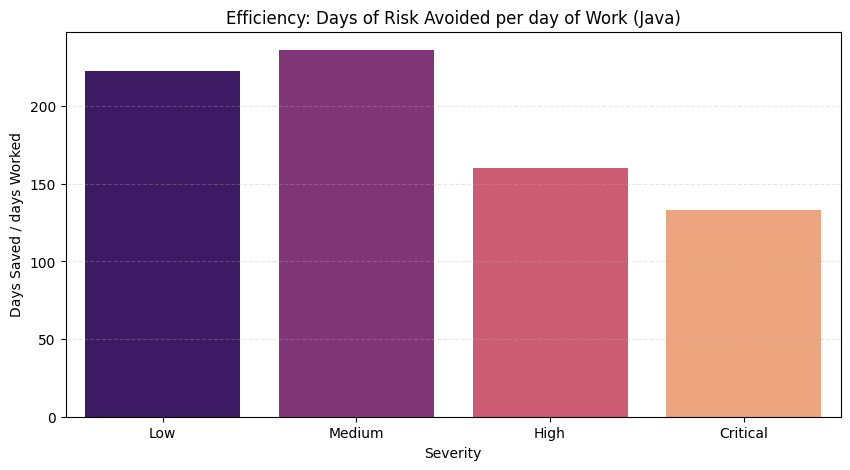

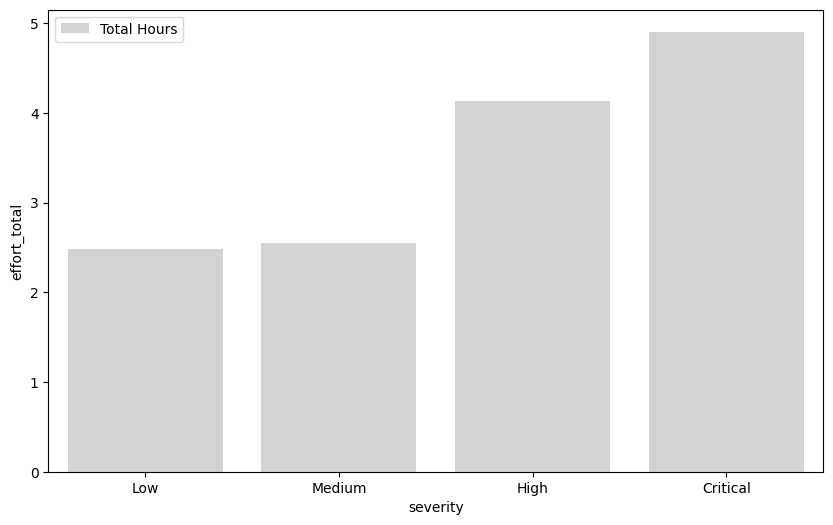

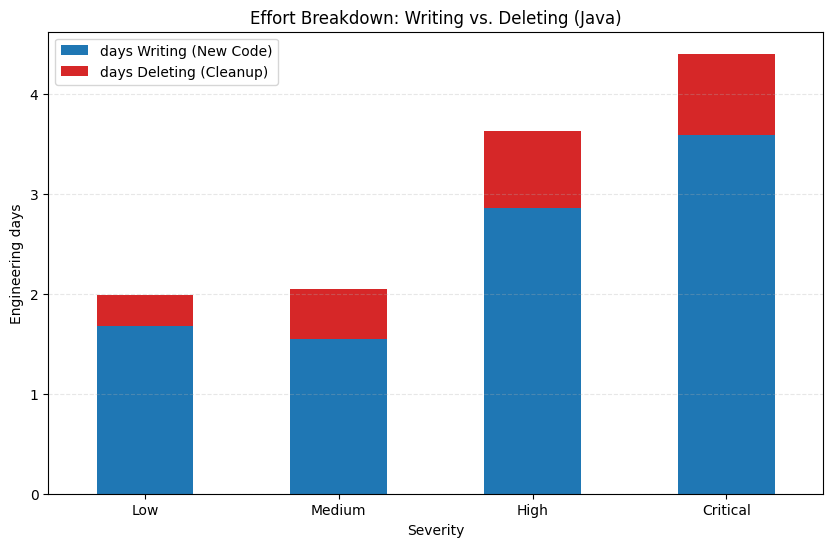

In [60]:
# We resetten de index even tijdelijk voor de plot, zodat 'severity' weer een kolom is
plot_data = df.reset_index()

# --- GRAFIEK 1: EFFICIENCY (Jouw originele plot, gerepareerd) ---
plt.figure(figsize=(10, 5))

sns.barplot(
    x='severity', 
    y='efficiency_ratio', 
    data=plot_data, 
    order=order, 
    palette='magma'
)

plt.title(f"Efficiency: Days of Risk Avoided per day of Work ({CURRENT_ECOSYSTEM})")
plt.ylabel("Days Saved / days Worked")
plt.xlabel("Severity")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

# --- GRAFIEK 2: EFFORT BREAKDOWN ---
# We gebruiken een 'Stacked Bar Chart'

# We pakken alleen de kolommen die we willen stapelen
effort_breakdown = df[['days_writing', 'days_deleting', 'effort_total']]

plt.figure(figsize=(10, 6))

# Stap 1: De totale balk (achtergrond)
sns.barplot(x=effort_breakdown.index, y='effort_total', data=effort_breakdown, order=order, color='lightgray', label='Total Hours')

# Stap 2: De 'Writing' uren (onderop)
# We plotten ze 'stacked' door een listige truc met seaborn of gewoon pandas plot
# Pandas plot is hier makkelijker voor stapelen:
ax = df[['days_writing', 'days_deleting']].plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#d62728'])

plt.title(f"Effort Breakdown: Writing vs. Deleting ({CURRENT_ECOSYSTEM})")
plt.ylabel("Engineering days")
plt.xlabel("Severity")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(["days Writing (New Code)", "days Deleting (Cleanup)"])
plt.xticks(rotation=0) # Zorgt dat de tekst recht staat

plt.show()


Grafiek opgeslagen als: sq3_efficiency_Java.pdf


/var/folders/s5/8b5j_kls30zg49cxlzy6rxl80000gn/T/ipykernel_98759/4293871261.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


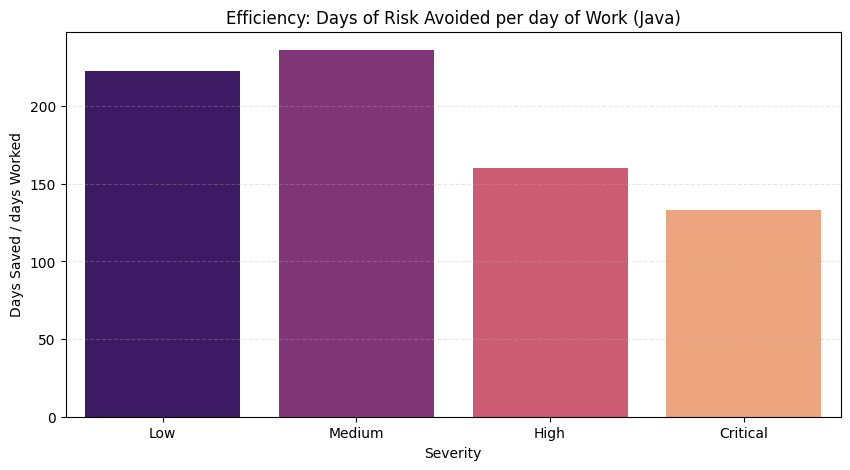

In [61]:
# We resetten de index even tijdelijk voor de plot, zodat 'severity' weer een kolom is
plot_data = df.reset_index()

# --- GRAFIEK 1: EFFICIENCY (Opslaan als PDF) ---
plt.figure(figsize=(10, 5))

sns.barplot(
    x='severity', 
    y='efficiency_ratio', 
    data=plot_data, 
    order=order, 
    palette='magma'
)

plt.title(f"Efficiency: Days of Risk Avoided per day of Work ({CURRENT_ECOSYSTEM})")
plt.ylabel("Days Saved / days Worked")
plt.xlabel("Severity")
plt.grid(axis='y', linestyle='--', alpha=0.3)

# --- HIER WORDT HIJ OPGESLAGEN ---
# We gebruiken de naam van het ecosysteem in de bestandsnaam
filename = f"sq3_efficiency_{CURRENT_ECOSYSTEM}.pdf"
plt.savefig(filename, format='pdf', bbox_inches='tight')
print(f"Grafiek opgeslagen als: {filename}")
# ---------------------------------

plt.show()